In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from thermo import simple_formula_parser
import datetime

In [70]:
df = pd.read_csv('ybaco_materials_all.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0,16,5,92.729214,61.051113,73.132787,37.513930,1.449309,1.146919,122.90607,...,0.0,0.0,0.0,0.0,0.0,0,0,0,82.0,Y1Ba1.5Ca0.5Cu3O7
1,1,28,4,64.632218,55.790060,48.775792,35.178830,1.139875,0.931491,122.90607,...,0.0,0.0,0.0,0.0,0.0,0,0,0,76.9,Yb16Ba1Cu2O
2,2,29,4,97.481600,152.464120,70.110388,137.387467,1.154762,0.387216,157.05460,...,0.0,0.0,0.0,0.0,0.0,0,0,0,65.3,Yb1.8Ba0.2Cu1O
3,3,30,4,97.481600,104.627000,70.110388,73.428983,1.154762,0.809544,157.05460,...,0.0,0.0,0.0,0.0,0.0,0,0,0,78.6,Yb6Ba1Cu1O
4,4,31,4,97.481600,139.466267,70.110388,115.819575,1.154762,0.605632,157.05460,...,0.0,0.0,0.0,0.0,0.0,0,0,0,79.3,Yb1.62La0.18Ba0.18Sr0.02Cu1O


In [71]:
y = df['critical_temp']
x = df.drop(['critical_temp'], axis=1).drop(['Unnamed: 0'], axis = 1).drop(['Unnamed: 0.1'], axis = 1).select_dtypes(exclude=['object'])

In [72]:
train_X, test_X, train_y, test_y = train_test_split(x.values, y.values, test_size=0.3)

In [73]:
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

In [74]:
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.50,learning_rate = 0.02, max_depth = 16, alpha = 1, n_estimators = 374)
model.fit(train_X, train_y, verbose=False) # treinando o modelo

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=16, min_child_weight=1, missing=None, n_estimators=374,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [75]:
avg = 0
predictions = 0
for i in range(1, 26):
    predictions = model.predict(test_X) # testando a predição
    avg += sqrt(mean_absolute_error(predictions, test_y))

In [76]:
print("rmse value: " + str(avg/25))

rmse value: 3.09598771599092


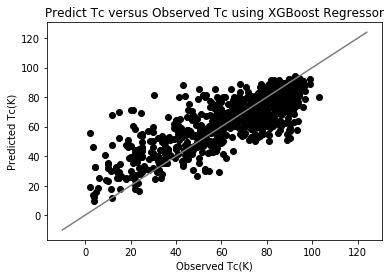

In [77]:
plt.title("Predict Tc versus Observed Tc using XGBoost Regressor")
plt.plot(test_y, predictions, "o", color="black")
plt.plot(range(-10, 125), range(-10, 125), color = 'gray')
plt.xlabel("Observed Tc(K)")
plt.ylabel("Predicted Tc(K)")
#plt.show -> plt.savefig
plt.show()

In [78]:
ybaco7 = df.loc[df['Unnamed: 0'] == 29]
ybaco7 = ybaco7.drop(['material'], axis=1)
observedValue = np.array(ybaco7['critical_temp'])
ybaco7 = ybaco7.drop(['critical_temp'], axis=1)

ybaco7 = ybaco7.drop(['Unnamed: 0'], axis = 1).drop(['Unnamed: 0.1'], axis = 1).select_dtypes(exclude=['object'])

ybaco7 = np.array(ybaco7)
print("XGBoost Regressor data: ")
print("Predicted value for Y1Ba2Cu3O7: ", model.predict(ybaco7)[0])
print("Observed value for Y1Ba2Cu3O7: ", observedValue[0])

XGBoost Regressor data: 
Predicted value for Y1Ba2Cu3O7:  91.19375
Observed value for Y1Ba2Cu3O7:  91.85


In [79]:
element_data = pd.read_csv('element_data.csv')

In [80]:
element_data.tail(2)

,Unnamed: 0,Element,AtomicMass,AtomicNumber,FirstIonizationEnergy,AtomicRadius,Block,BoilingPoint,BrinellHardness,CovalentRadius,...,Series,SoundSpeed,SpaceGroupNumber,SpecificHeat,ThermalConductivity,ThermalExpansion,Valence,VaporizationHeat,VolumeMagneticSusceptibility,SuperconductingPoint
84,astatine,At,210.0,85,916.3,127.0,p,NaN,NaN,150,...,Halogen,NaN,NaN,NaN,2.00000,NaN,7,40.0,NaN,NaN
85,radon,Rn,222.0,86,1036.5,120.0,p,-61.7,NaN,150,...,NobleGas,NaN,NaN,93.65,0.00361,NaN,6,17.0,NaN,NaN


In [81]:
ybaco7 = df.loc[df['Unnamed: 0'] == 29]

In [82]:
ybaco7 = ybaco7['material']

In [83]:
ybaco7 = np.array(ybaco7)

In [84]:
ybaco7 = ybaco7[0]

In [85]:
ybaco7 = simple_formula_parser(str(ybaco7))

In [86]:
ybaco7

{'Y': 1, 'Ba': 2, 'Cu': 3, 'O': 7}

In [87]:
elementList = []
for chem in ybaco7:
    elementList.append(chem)

In [88]:
elementList

['Y', 'Ba', 'Cu', 'O']

In [89]:
elementList = np.array(elementList)
elementList = elementList[np.newaxis, :]
elementList = np.resize(elementList, (2, 4))

In [90]:
elementList

array([['Y', 'Ba', 'Cu', 'O'],
       ['Y', 'Ba', 'Cu', 'O']], dtype='<U2')

In [91]:
shadowList = []
for chem in ybaco7.values():
    shadowList.append(chem)

In [92]:
shadowList = np.array(shadowList)

In [93]:
elementList[1] = shadowList
print(elementList)

[['Y' 'Ba' 'Cu' 'O']
 ['1' '2' '3' '7']]


In [94]:
for element in elementList[0]:
    temp = element_data.loc[element_data['Element'] == element]
    temp = np.array(temp)
    print(temp)

[['yttrium' 'Y' 88.90585 39 615.4 212.0 'd' 3345.0 588.0 190
  'simple_hexagonal' 4472.0 1800000.0 29.6 1.22 11.4 3.0 4240.0
  'paramagnetic' 6.66e-08 1526.0 5.920000000000001e-09 1.988e-05 5
  'solid' 0.24 5.7e-07 'TransitionMetal' 3300.0 194.0 298.0 17.0 1.06e-05
  3 380.0 0.00029780000000000003 1.3]]
[['barium' 'Ba' 137.327 56 502.5 253.0 's' 1870.0 nan 215
  'body_centered_cubic' 3510.0 2900000.0 13.95 0.89 8.0 2.0 3338.0
  'paramagnetic' 1.1299999999999999e-08 727.0 1.55e-09 3.912e-05 6
  'solid' nan 3.5e-07 'AlkalineEarthMetal' 1620.0 229.0 205.0 18.0
  2.0600000000000003e-05 2 140.0 3.966e-05 nan]]
[['copper' 'Cu' 63.54600000000001 29 745.0 145.0 'd' 2562.0 874.0 132
  'face_centered_cubic' 8960.0 59000000.0 118.4 1.9 13.1 11.0 8020.0
  'diamagnetic' -1.0800000000000002e-09 1084.62 -6.86e-11 7.09e-06 4
  'solid' 0.34 1.7e-08 'TransitionMetal' 3570.0 225.0 384.4 400.0
  1.65e-05 2 300.0 -9.63e-06 nan]]
[['oxygen' 'O' 15.9994 8 1313.1 48.0 'p' -182.9 nan 66
  'base_centered_monocl

The code above is for test the data we extracted from Kam Hamidieh's model

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
forestModel = RandomForestRegressor(n_estimators=60)

In [97]:
forestModel.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
avg_forest = 0
predictions_forest = 0
for i in range(1, 26):
    predictions_forest = forestModel.predict(test_X) # testando a predição da random forest
    avg_forest += sqrt(mean_absolute_error(predictions_forest, test_y))

In [99]:
print('RandomForests Regressor RMSE(for comparison): ', str(avg_forest/25))

RandomForests Regressor RMSE(for comparison):  3.0514756029219354


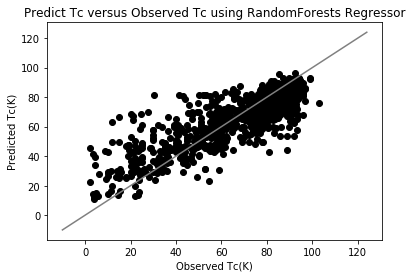

In [100]:
plt.title("Predict Tc versus Observed Tc using RandomForests Regressor")
plt.plot(test_y, predictions_forest, "o", color="black")
plt.plot(range(-10, 125), range(-10, 125), color = 'gray')
plt.xlabel("Observed Tc(K)")
plt.ylabel("Predicted Tc(K)")
#plt.show -> plt.savefig
plt.show()

In [101]:
ybaco7 = df.loc[df['Unnamed: 0'] == 29]
ybaco7 = ybaco7.drop(['material'], axis=1)
observedValue = np.array(ybaco7['critical_temp'])
ybaco7 = ybaco7.drop(['critical_temp'], axis=1)

ybaco7 = ybaco7.drop(['Unnamed: 0'], axis = 1).drop(['Unnamed: 0.1'], axis = 1).select_dtypes(exclude=['object'])

ybaco7 = np.array(ybaco7)
print("RandomForests Regressor data: ")
print("Predicted value for Y1Ba2Cu3O7: ", forestModel.predict(ybaco7)[0])
print("Observed value for Y1Ba2Cu3O7: ", observedValue[0])

RandomForests Regressor data: 
Predicted value for Y1Ba2Cu3O7:  90.67583333333337
Observed value for Y1Ba2Cu3O7:  91.85


In [102]:
model.score(test_X, test_y)

0.6903639930480368

In [103]:
forestModel.score(test_X, test_y)

0.7018859354221536

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
knnModel = KNeighborsRegressor(n_jobs=-1, weights='distance')

In [106]:
knnModel.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='distance')

In [107]:
knnModel.score(test_X, test_y)

0.29751959537145434

In [108]:
avg_knn = 0
predictions_knn = 0
for i in range(1, 26):
    predictions_knn = knnModel.predict(test_X) # testando a predição com knn
    avg_knn += sqrt(mean_absolute_error(predictions_knn, test_y))

In [109]:
print('KNN Regressor RMSE(for comparison): ', str(avg_knn/25))

KNN Regressor RMSE(for comparison):  3.761856177382019


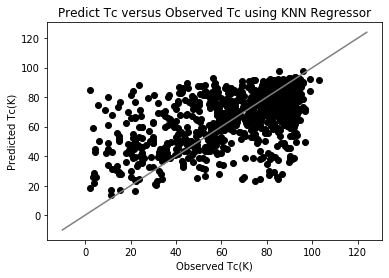

In [110]:
plt.title("Predict Tc versus Observed Tc using KNN Regressor")
plt.plot(test_y, predictions_knn, "o", color="black")
plt.plot(range(-10, 125), range(-10, 125), color = 'gray')
plt.xlabel("Observed Tc(K)")
plt.ylabel("Predicted Tc(K)")
#plt.show -> plt.savefig
plt.show()